# Add surfaces to an object
Here, we show a procedure to add an structured surface to an object. The surafaces are to lenses. The first one is an Frsnel lens, and the second surface is an stardard lens.

Two examples are performed. Add the surfaces to a layer and to a biprism

In [4]:
from diffractio import plt, np
from diffractio import mm, degrees, um
from diffractio.diffractio import Diffractio 


In [5]:
x0 = np.linspace(-50*um, 50*um, 2048)
z0 = np.linspace(-10*um, 100*um, 1024)
wavelength = 1*um
n_background = 1


In [6]:
u0 = Diffractio('scalar','source', x=x0, wavelength=wavelength)
u0.plane_wave()

##  Surfaces


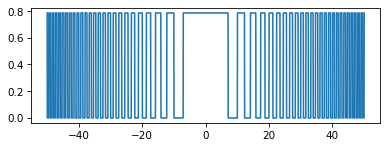

In [7]:
surface_1 = Diffractio('scalar', 'mask', x=x0, wavelength=wavelength, n_background=1, info='')

h1 = surface_1.fresnel_lens(x0=0.0,
                            focal=50*um,
                            binary=True,
                            kind='phase',
                            phase=np.pi/2,
                            radius=1*mm)

plt.figure(figsize=(6, 2))
plt.plot(surface_1.x, h1.real)


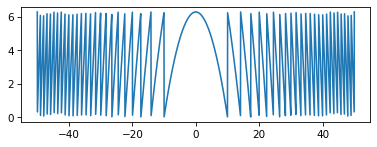

In [8]:
surface_2 = Diffractio('scalar', 'mask', x=x0, wavelength=wavelength, n_background=1, info='')
h2 = surface_2.fresnel_lens(x0=0.0, focal=50*um, binary=False, kind='phase', phase=np.pi/2, radius=1*mm)        

plt.figure(figsize=(6, 2))
plt.plot(surface_2.x, h2.real)


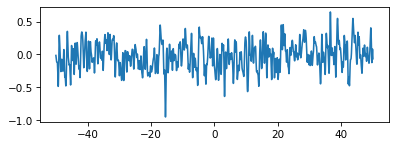

In [9]:
surface_3 = Diffractio('scalar', 'mask', x=x0, wavelength=wavelength, n_background=1, info='')
h3 = surface_3.roughness(t=.25*um, s=.2*um)

plt.figure(figsize=(6, 2))
plt.plot(surface_3.x, h3.real)

In [10]:
fx1 = surface_1.x, h1 * wavelength
fx2 = surface_2.x, h2 * wavelength
fx3 = surface_3.x, h3 * wavelength

## Layer

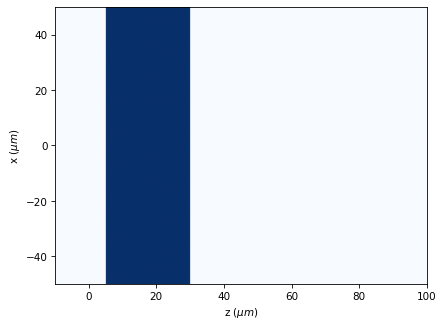

In [11]:
layer = Diffractio('scalar', 'mask', x=x0, z=z0, wavelength=wavelength, n_background=n_background, info='')
layer.layer(r0=(0*mm, 5*um),
            refractive_index=1.5,
            depth=25*um,
            angle=0)
layer.draw_refractive_index()

In [12]:
layer.add_surfaces(fx=(fx1, fx2),
                   refractive_index=1.5,
                   x_sides=[-1*mm, 1*mm],
                   min_incr=0.1,
                   angle=0*degrees)


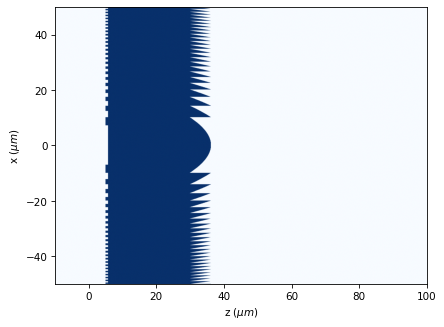

In [13]:
layer.draw_refractive_index(draw_borders=False)

borders = layer.borders



**Propagation**

In [14]:
layer.incident_field(u0)

In [15]:
layer.clear_field()
layer.WPM(verbose=True, has_edges=False)

Time = 0.16 s, time/loop = 0.1539 ms
size = 96.29 Mbytes


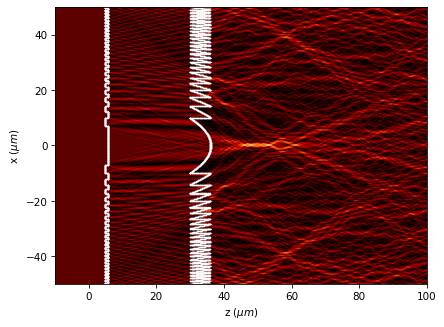

In [16]:
layer.draw(logarithm=1e0, normalize='maximum', draw_borders=True, edge_matrix=borders)


## Biprism

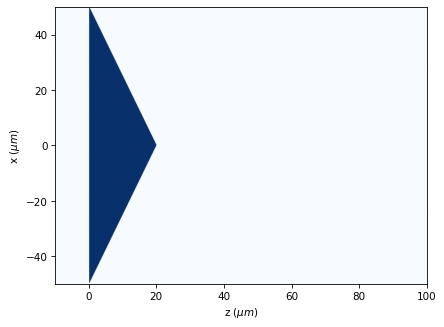

In [17]:
biprism = Diffractio('scalar', 'mask', x=x0, z=z0, wavelength=wavelength, n_background=n_background, info='')
biprism.biprism(r0=(0*um, 0*um),
                length=100*um,
                height=20*um,
                refractive_index=1.5)
biprism.draw_refractive_index()
borders = biprism.borders


In [18]:
biprism.incident_field(u0)

Time = 0.15 s, time/loop = 0.1452 ms
size = 96.02 Mbytes


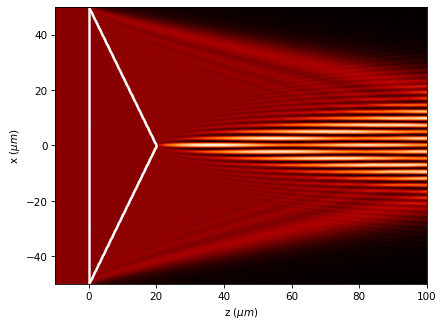

In [19]:
biprism.clear_field()
biprism.WPM(verbose=True, has_edges=False)
biprism.draw(logarithm=1e0,  draw_borders=True, edge_matrix=borders)


In [20]:
biprism.add_surfaces(fx=(fx3, fx1),
                     refractive_index=1.5,
                     x_sides=[-1*mm, 1*mm],
                     min_incr=0.1,
                     angle=0*degrees)


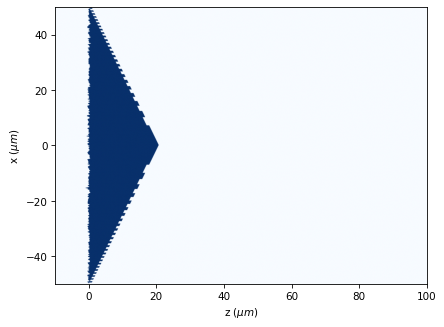

In [21]:
biprism.draw_refractive_index(draw_borders=False)
borders = biprism.borders

**Propagation**

Time = 0.16 s, time/loop = 0.1608 ms
size = 96.17 Mbytes


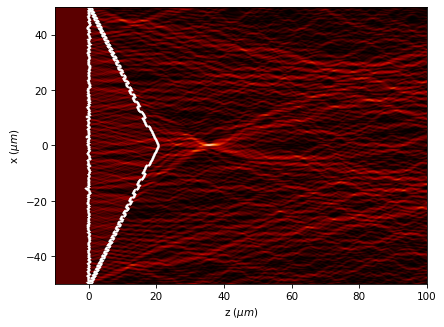

In [22]:
biprism.clear_field()
biprism.WPM(verbose=True, has_edges=False)
biprism.draw(logarithm=1e0,  draw_borders=True, edge_matrix=borders)


## Diffractive lens on a standard lens

79.99440039197256


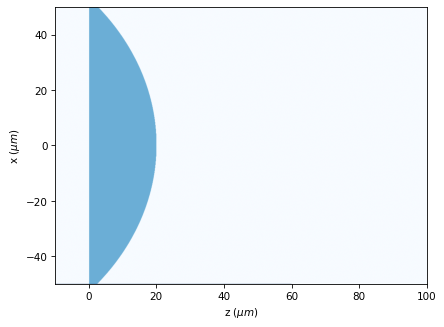

In [23]:
lens = Diffractio('scalar', 'mask', x=x0, z=z0, wavelength=wavelength, n_background=n_background, info='')

focal, _ = lens.lens(r0=(0 * um, 0 * um), size= 100*um, radii=(1000*mm, -80*um), thickness=20*um, 
                     refractive_index=2, angle=0 * degrees, mask=(100 * um, 3 + 0.1j)

)
print(focal)
lens.draw_refractive_index()
lens.surface_detection()
edge_matrix = lens.borders



In [24]:
lens.incident_field(u0)

Time = 0.21 s, time/loop = 0.2069 ms
size = 96.19 Mbytes


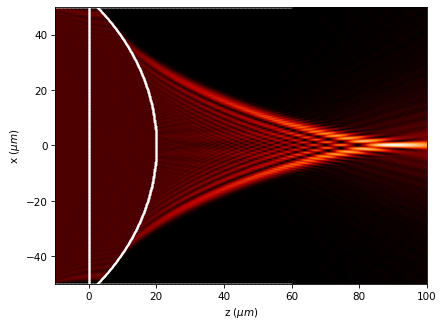

In [25]:
lens.clear_field()
lens.WPM(verbose=True, has_edges=False)
lens.draw(logarithm=1e0,  draw_borders=True, edge_matrix=edge_matrix)


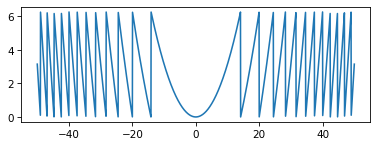

In [26]:
fresnel_lens = Diffractio('scalar', 'mask', x=x0, wavelength=wavelength, n_background=1, info='')
h_fresnel = fresnel_lens.fresnel_lens(x0=0.0, focal=-100*um, binary=False, kind='phase', phase=np.pi/10, radius=1*mm)

plt.figure(figsize=(6, 2))
plt.plot(fresnel_lens.x, h_fresnel.real)

In [27]:
fx_s = surface_1.x, h_fresnel * wavelength/4


In [28]:
lens.add_surfaces(fx=(fx_s, None),
                    refractive_index=2,
                    x_sides=[-1*mm, 1*mm],
                    min_incr=0.1,
                    angle=0*degrees)


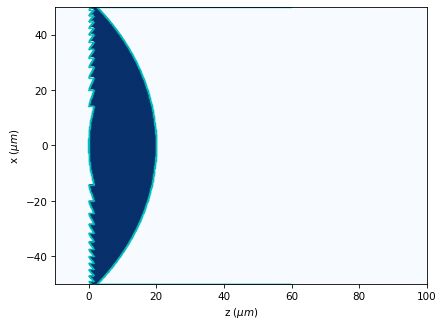

In [29]:
lens.surface_detection
lens.draw_refractive_index(draw_borders=True)

**Propagation**

Time = 0.19 s, time/loop = 0.1823 ms
size = 96.19 Mbytes


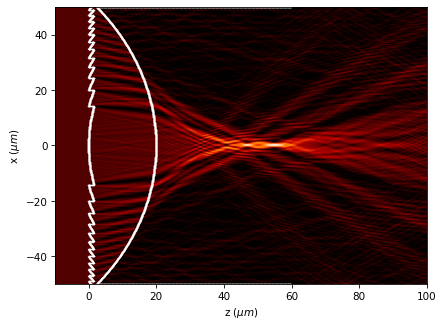

In [30]:
lens.clear_field()
lens.WPM(verbose=True, has_edges=False)
lens.draw(logarithm=1e0,  draw_borders=True)
